***Bishal Kundu***

***Encryptix | Data Science Internship***

***Titanic Survival Prediction | | Task 1***

In [225]:
# Importing the libraries and Data

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

mvdf=pd.read_csv('/content/IMDb Movies India.csv',encoding='latin-1')
mvdf.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [226]:
# Data shape & Number of unique values
print(mvdf.shape)
print(mvdf.nunique())

(15509, 10)
Name        13838
Year          102
Duration      182
Genre         485
Rating         84
Votes        2034
Director     5938
Actor 1      4718
Actor 2      4891
Actor 3      4820
dtype: int64


In [227]:
# Data Info
mvdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [228]:
# Droping unnecessary data

mvdf=mvdf.drop(['Name','Actor 3'],axis=1)
mvdf.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2
0,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal
1,(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande
2,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur
3,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj
4,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta


In [229]:
#Data unique value counts

print(mvdf['Genre'].value_counts())
print(mvdf['Votes'].value_counts())

Genre
Drama                         2780
Action                        1289
Thriller                       779
Romance                        708
Drama, Romance                 524
                              ... 
Action, Musical, War             1
Horror, Crime, Thriller          1
Animation, Comedy                1
Romance, Action, Crime           1
Adventure, Fantasy, Sci-Fi       1
Name: count, Length: 485, dtype: int64
Votes
8        227
7        224
9        221
6        213
10       175
        ... 
1,754      1
1,208      1
1,148      1
1,277      1
1,496      1
Name: count, Length: 2034, dtype: int64


In [230]:
# Null values

mvdf.isna().sum()

,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384


In [231]:
# removing Null values

mvdf=mvdf.dropna()
print(mvdf.isna().sum())
print(mvdf.head())

Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
dtype: int64
     Year Duration                      Genre  Rating  Votes        Director  \
1  (2019)  109 min                      Drama     7.0      8   Gaurav Bakshi   
3  (2019)  110 min            Comedy, Romance     4.4     35      Ovais Khan   
5  (1997)  147 min     Comedy, Drama, Musical     4.7    827    Rahul Rawail   
6  (2005)  142 min        Drama, Romance, War     7.4  1,086  Shoojit Sircar   
8  (2012)   82 min  Horror, Mystery, Thriller     5.6    326   Allyson Patel   

           Actor 1                 Actor 2  
1     Rasika Dugal          Vivek Ghamande  
3          Prateik              Ishita Raj  
5       Bobby Deol  Aishwarya Rai Bachchan  
6  Jimmy Sheirgill          Minissha Lamba  
8        Yash Dave          Muntazir Ahmad  


In [232]:
# Changing data type to integer

mvdf[['Year','Duration','Votes']] = mvdf[['Year','Duration','Votes']].astype(str)
mvdf['Year'] = mvdf['Year'].str.strip('()').astype(int)
mvdf['Duration'] = mvdf['Duration'].str.replace(' min','').astype(int)
mvdf['Votes'] = mvdf['Votes'].str.replace(',','').astype(int)

In [233]:
mvdf.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2
1,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande
3,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj
5,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan
6,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba
8,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad


In [234]:
# new data type

mvdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5705 entries, 1 to 15508
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      5705 non-null   int64  
 1   Duration  5705 non-null   int64  
 2   Genre     5705 non-null   object 
 3   Rating    5705 non-null   float64
 4   Votes     5705 non-null   int64  
 5   Director  5705 non-null   object 
 6   Actor 1   5705 non-null   object 
 7   Actor 2   5705 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 401.1+ KB


In [235]:
# Splitting the column

mvdf[['G1','G2','G3']]=mvdf['Genre'].str.split(',',expand=True)
mvdf

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,G1,G2,G3
1,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Drama,None,None
3,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Comedy,Romance,None
5,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Comedy,Drama,Musical
6,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Drama,Romance,War
8,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Horror,Mystery,Thriller
...,...,...,...,...,...,...,...,...,...,...,...
15493,2015,115,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Drama,None,None
15494,2001,153,"Biography, Drama, History",6.2,1496,Shyam Benegal,Karisma Kapoor,Rekha,Biography,Drama,History
15503,1989,125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Action,Crime,Drama
15505,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Action,Drama,None


In [236]:
# Changing the column values to number

le=LabelEncoder()
mvdf['D_n']=le.fit_transform(mvdf['Director'])
mvdf['A_1']=le.fit_transform(mvdf['Actor 1'])
mvdf['A_2']=le.fit_transform(mvdf['Actor 2'])
mvdf['G_1']=le.fit_transform(mvdf['G1'])

# Creating new data frames for keeping the director, actor, genre name and identifying number

Directors=pd.DataFrame({'Director':mvdf['Director'].unique(),'Number':mvdf['D_n'].unique()})
Actors1=pd.DataFrame({'Actor1':mvdf['Actor 1'].unique(),'Number':mvdf['A_1'].unique()})
Actors2=pd.DataFrame({'Actor2':mvdf['Actor 2'].unique(),'Number':mvdf['A_2'].unique()})
Genres=pd.DataFrame({'Genre':mvdf['G1'].unique(),'Number':mvdf['G_1'].unique()})

# Droping unnecessary columns

mvdf=mvdf.drop(['G1','G2','G3','Genre','Actor 1','Director','Actor 2'],axis=1)
mvdf

,Year,Duration,Rating,Votes,D_n,A_1,A_2,G_1
1,2019,109,7.0,8,639,1376,2308,7
3,2019,110,4.4,35,1352,1221,730,4
5,1997,147,4.7,827,1547,384,76,4
6,2005,142,7.4,1086,2066,703,1128,7
8,2012,82,5.6,326,139,1968,1192,11
...,...,...,...,...,...,...,...,...
15493,2015,115,6.1,408,1237,1893,1827,7
15494,2001,153,6.2,1496,2081,775,1643,3
15503,1989,125,5.8,44,1812,412,765,0
15505,1999,129,4.5,655,1036,116,2198,0


In [237]:
# Arranging the data based on ascending numbers

Directors=Directors.sort_values(by='Number')
Actors1=Actors1.sort_values(by='Number')
Actors2=Actors2.sort_values(by='Number')
Genres=Genres.sort_values(by='Number')

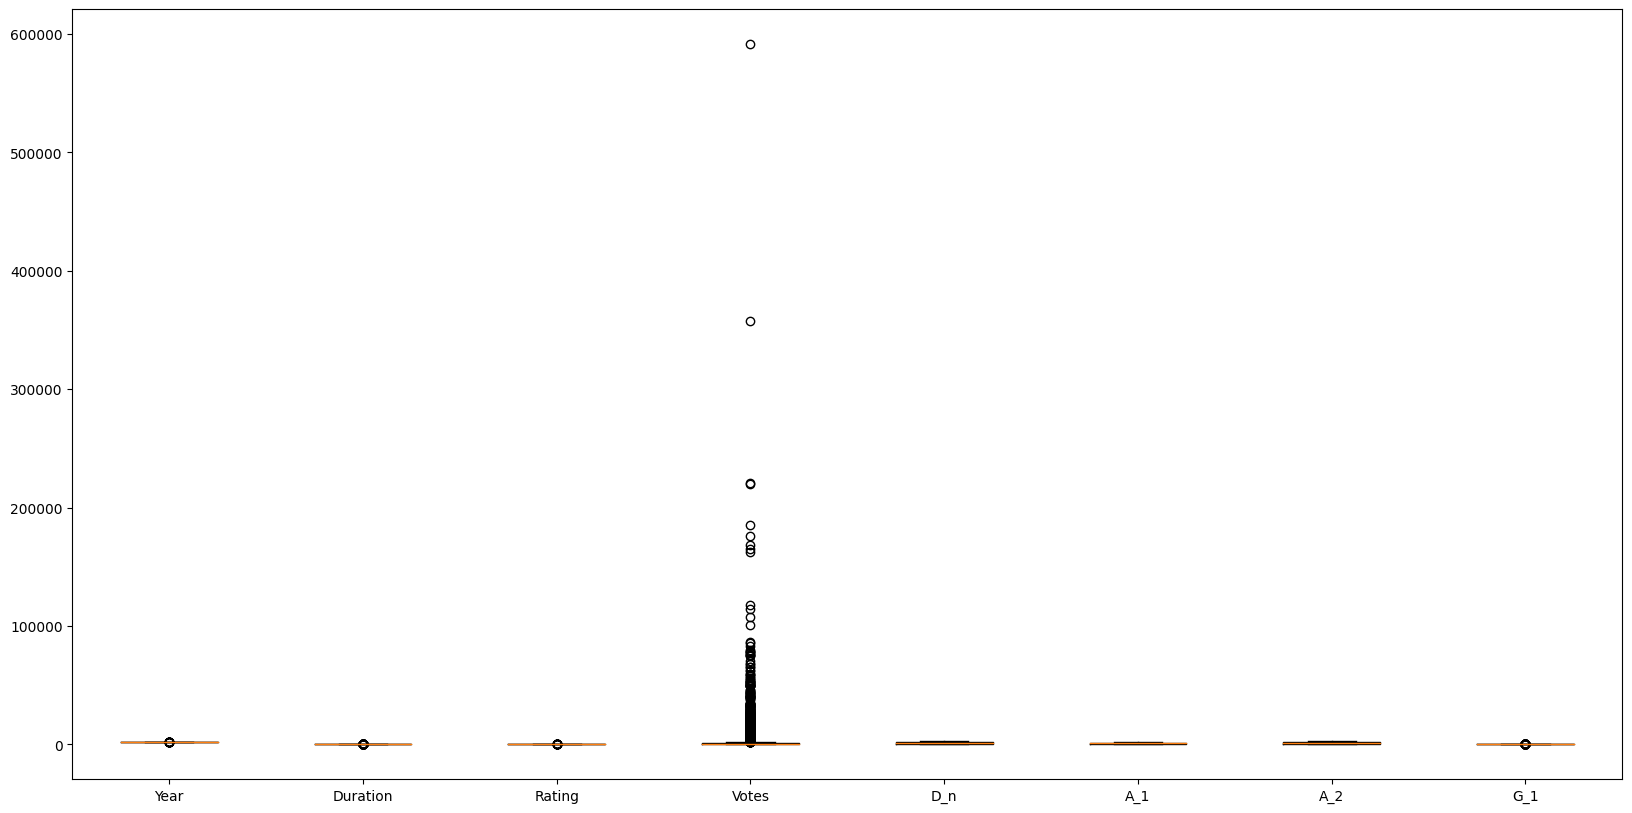

In [238]:
# Checking outliers

plt.figure(figsize=(20,10))
plt.boxplot(mvdf, labels=mvdf.columns)
plt.show()

Outliers were not removed as the data may data depend on the absolute values so I think i sould not change it.

In [239]:
# Statistical description of the data

mvdf.describe()

,Year,Duration,Rating,Votes,D_n,A_1,A_2,G_1
count,5705.000000,5705.000000,5705.000000,5705.000000,5705.000000,5705.000000,5705.000000,5705.000000
mean,1996.363891,133.130412,5.903751,2676.656091,1226.213322,984.092901,1201.096407,4.840841
std,19.728098,25.581255,1.383394,13598.359008,693.883946,574.519365,677.283663,4.220880
min,1931.000000,21.000000,1.100000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,1983.000000,118.000000,5.000000,30.000000,645.000000,475.000000,627.000000,0.000000
50%,2002.000000,135.000000,6.100000,128.000000,1212.000000,988.000000,1215.000000,4.000000
75%,2013.000000,150.000000,6.900000,903.000000,1812.000000,1496.000000,1796.000000,7.000000
max,2021.000000,321.000000,10.000000,591417.000000,2458.000000,1994.000000,2357.000000,19.000000


In [240]:
# Corelation table

mvdf.corr()

,Year,Duration,Rating,Votes,D_n,A_1,A_2,G_1
Year,1.000000,-0.332001,-0.200866,0.128184,0.028445,-0.010304,-0.058592,-0.031502
Duration,-0.332001,1.000000,-0.004425,0.098520,0.015508,-0.021667,0.002459,-0.185206
Rating,-0.200866,-0.004425,1.000000,0.141014,-0.004412,0.022685,0.040277,0.078877
Votes,0.128184,0.098520,0.141014,1.000000,-0.009436,-0.029838,-0.030988,-0.077221
D_n,0.028445,0.015508,-0.004412,-0.009436,1.000000,0.022557,0.018777,-0.013522
A_1,-0.010304,-0.021667,0.022685,-0.029838,0.022557,1.000000,0.002553,0.045704
A_2,-0.058592,0.002459,0.040277,-0.030988,0.018777,0.002553,1.000000,0.021174
G_1,-0.031502,-0.185206,0.078877,-0.077221,-0.013522,0.045704,0.021174,1.000000


In [241]:
#Creating variables

x=mvdf.drop(['Rating'],axis=1)
y=mvdf['Rating']
x,y

(       Year  Duration  Votes   D_n   A_1   A_2  G_1
 1      2019       109      8   639  1376  2308    7
 3      2019       110     35  1352  1221   730    4
 5      1997       147    827  1547   384    76    4
 6      2005       142   1086  2066   703  1128    7
 8      2012        82    326   139  1968  1192   11
 ...     ...       ...    ...   ...   ...   ...  ...
 15493  2015       115    408  1237  1893  1827    7
 15494  2001       153   1496  2081   775  1643    3
 15503  1989       125     44  1812   412   765    0
 15505  1999       129    655  1036   116  2198    0
 15508  1998       130     20   905   475   764    0
 
 [5705 rows x 7 columns],
 1        7.0
 3        4.4
 5        4.7
 6        7.4
 8        5.6
         ... 
 15493    6.1
 15494    6.2
 15503    5.8
 15505    4.5
 15508    6.2
 Name: Rating, Length: 5705, dtype: float64)

In [242]:
# Training the data

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=42)

In [243]:
# Model creation and prediction

linreg=LinearRegression()
linreg.fit(x_train,y_train)
y_pred=linreg.predict(x_test)
y_pred

array([5.67458134, 6.40316494, 5.58337284, ..., 5.48192506, 5.53302462,
       5.49055351])

In [244]:
# Model score
linreg.score(x_test,y_pred)

1.0

In [245]:
# Regression metrics

Mae=mean_absolute_error(y_test,y_pred)
Mse=mean_squared_error(y_test,y_pred)
R=r2_score(y_test,y_pred)
Mae,Mse,R

(1.0416538988597213, 1.8031608818166422, 0.035308536786540556)

In [246]:
# Data tables for Directors,Actors, Genre

print(Directors.head())
print(Actors.head())
print(Genres.head())

            Director  Number
107     A. Bhimsingh       0
1416  A. Jagannathan       1
2247        A. Majid       2
2234        A. Muthu       3
1114       A. Salaam       4
                   Actor  Number
1547            A. Muthu       0
1340          A. Nairang       1
930          A.K. Hangal       2
143   A.S. Ravindra Babu       3
484       Aachi Manorama       4
        Genre  Number
3      Action       0
6   Adventure       1
17  Animation       2
8   Biography       3
1      Comedy       4


In [247]:
mvdf.head()

,Year,Duration,Rating,Votes,D_n,A_1,A_2,G_1
1,2019,109,7.0,8,639,1376,2308,7
3,2019,110,4.4,35,1352,1221,730,4
5,1997,147,4.7,827,1547,384,76,4
6,2005,142,7.4,1086,2066,703,1128,7
8,2012,82,5.6,326,139,1968,1192,11


The preduction will be done for the 1st film from the table

In [248]:
# Prediction depending on year

import warnings
warnings.filterwarnings('ignore')
y1=linreg.predict([[2019,109,7,639,1376,2308,7]])
y2=linreg.predict([[2025,109,7,639,1376,2308,7]])
y3=linreg.predict([[2000,109,7,639,1376,2308,7]])
y4=linreg.predict([[1950,109,7,639,1376,2308,7]])
y1,y2,y3,y4

(array([5.61419365]),
 array([5.49759367]),
 array([5.98342693]),
 array([6.95509346]))

In [249]:
#Prediction depending on duration

d1=linreg.predict([[2019,109,7,639,1376,2308,7]])
d2=linreg.predict([[2019,77,7,639,1376,2308,7]])
d3=linreg.predict([[2019,200,7,639,1376,2308,7]])
d4=linreg.predict([[2019,1000,7,639,1376,2308,7]])
d1,d2,d3,d4

(array([5.61419365]),
 array([5.78133458]),
 array([5.13888663]),
 array([0.96036335]))

In [250]:
# Prediction depending on votes

v1=linreg.predict([[2019,109,7,639,1376,2308,7]])
v2=linreg.predict([[2019,109,70,639,1376,2308,7]])
v3=linreg.predict([[2019,109,700,639,1376,2308,7]])
v4=linreg.predict([[2019,109,7000,639,1376,2308,7]])
v1,v2,v3,v4

(array([5.61419365]),
 array([5.61610781]),
 array([5.63524946]),
 array([5.82666588]))

In [251]:
# Generes

Genres.head(10)

,Genre,Number
3,Action,0
6,Adventure,1
17,Animation,2
8,Biography,3
1,Comedy,4
4,Crime,5
9,Documentary,6
0,Drama,7
15,Family,8
13,Fantasy,9


In [252]:
# Predection depending on genere

g1=linreg.predict([[2019,109,7,639,1376,2308,7]])
g2=linreg.predict([[2019,109,70,639,1376,2308,0]])
g3=linreg.predict([[2019,109,700,639,1376,2308,1]])
g4=linreg.predict([[2019,109,7000,639,1376,2308,4]])
g1,g2,g3,g4

(array([5.61419365]),
 array([5.44830397]),
 array([5.49141759]),
 array([5.75474994]))

Thank You